<a href="https://colab.research.google.com/github/BigBisus/PyLab-1-2025/blob/main/PyLab_1_Full_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
class Student:
    def __init__(self, name, group, grades):
        self.name = name
        self.group = group
        self.grades = list(map(float, grades))

    def average_grade(self):
        return sum(self.grades) / len(self.grades)

    def is_excellent(self):
        return self.average_grade() >= 4.5

students = []
with open("students.txt", "r", encoding="utf-8") as f:
    for line in f:
        name, group, grades_str = line.strip().split(";")
        grades = grades_str.split(",")
        students.append(Student(name, group, grades))

with open("excellent_students.txt", "w", encoding="utf-8") as f:
    for s in students:
        if s.is_excellent():
            f.write(f"{s.name} - {s.group}\n")

from collections import defaultdict
group_grades = defaultdict(list)

for s in students:
    group_grades[s.group].append(s.average_grade())

for group, avgs in group_grades.items():
    print(f"Группа {group}: средний балл = {sum(avgs)/len(avgs):.2f}")

Группа ИП-111: средний балл = 4.80
Группа ИГ-202: средний балл = 4.10
Группа ФИЗ-101: средний балл = 4.00
Группа ЗФ-121: средний балл = 4.60
Группа ЗФ-222: средний балл = 4.40


In [8]:
import re


def analyze_logs(log_text):
    results = {}

    # 1. Поиск IPv4 адресов
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    ip_addresses = re.findall(ip_pattern, log_text)
    results['ip_addresses'] = ip_addresses

    # 2. Поиск временных меток
    timestamp_pattern = r'\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b'
    timestamps = re.findall(timestamp_pattern, log_text)
    results['timestamps'] = timestamps

    # 3. Поиск слов в UPPERCASE
    uppercase_pattern = r'\b[A-ZА-Я]{2,}\b'
    uppercase_words = re.findall(uppercase_pattern, log_text)
    results['uppercase_words'] = uppercase_words

    # 4. Замена email-адресов
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    protected_log = re.sub(email_pattern, '[EMAIL PROTECTED]', log_text)
    results['protected_log'] = protected_log

    return results



log_text = """
2023-10-15 14:30:25 Сервер запущен. IP: 192.168.1.1
2023-10-15 14:35:40 Пользователь ADMIN вошел в систему с IP 10.0.0.45
2023-10-15 14:40:15 ОШИБКА: Соединение с 8.8.8.8 прервано
2023-10-15 14:45:30 Отправлено письмо на email: user@example.com
2023-10-15 14:50:00 Получено письмо от admin@server.com
2023-10-15 14:55:45 КРИТИЧЕСКАЯ ОШИБКА в модуле SECURITY
2023-10-15 15:00:10 DNS запрос к 1.1.1.1 неуспешен
2023-10-15 15:05:25 Пользователь TESTUSER вышел из системы
2023-10-15 15:10:40 Резервное копирование завершено УСПЕШНО
"""
results = analyze_logs(log_text)

print("\n1. Найденные IPv4 адреса:")
for ip in results['ip_addresses']:
        print(f"   - {ip}")

print("\n2. Найденные временные метки:")
for timestamp in results['timestamps']:
        print(f"   - {timestamp}")

print("\n3. Найденные UPPERCASE")
for word in results['uppercase_words']:
        print(f"   - {word}")

print("\n4. Лог с защищенными email-адресами:")
print(results['protected_log'])





1. Найденные IPv4 адреса:
   - 192.168.1.1
   - 10.0.0.45
   - 8.8.8.8
   - 1.1.1.1

2. Найденные временные метки:
   - 2023-10-15 14:30:25
   - 2023-10-15 14:35:40
   - 2023-10-15 14:40:15
   - 2023-10-15 14:45:30
   - 2023-10-15 14:50:00
   - 2023-10-15 14:55:45
   - 2023-10-15 15:00:10
   - 2023-10-15 15:05:25
   - 2023-10-15 15:10:40

3. Найденные UPPERCASE
   - IP
   - ADMIN
   - IP
   - ОШИБКА
   - КРИТИЧЕСКАЯ
   - ОШИБКА
   - SECURITY
   - DNS
   - TESTUSER
   - УСПЕШНО

4. Лог с защищенными email-адресами:

2023-10-15 14:30:25 Сервер запущен. IP: 192.168.1.1
2023-10-15 14:35:40 Пользователь ADMIN вошел в систему с IP 10.0.0.45
2023-10-15 14:40:15 ОШИБКА: Соединение с 8.8.8.8 прервано
2023-10-15 14:45:30 Отправлено письмо на email: [EMAIL PROTECTED]
2023-10-15 14:50:00 Получено письмо от [EMAIL PROTECTED]
2023-10-15 14:55:45 КРИТИЧЕСКАЯ ОШИБКА в модуле SECURITY
2023-10-15 15:00:10 DNS запрос к 1.1.1.1 неуспешен
2023-10-15 15:05:25 Пользователь TESTUSER вышел из системы
2023-10-

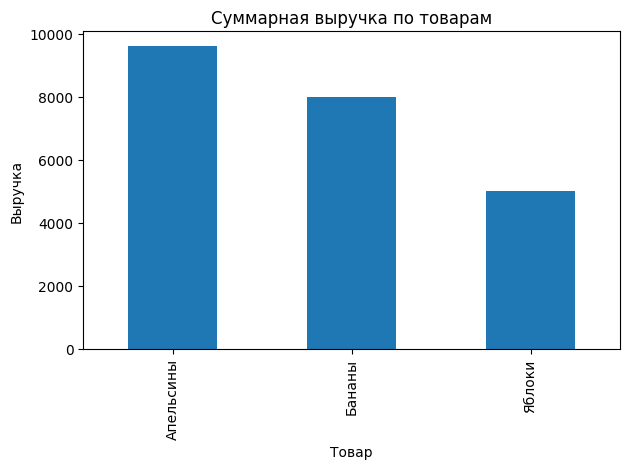

,Товар,Цена,Количество,Общая_стоимость
0,Яблоки,100.0,50,5000.0
1,Бананы,80.0,100,8000.0
2,Яблоки,NaN,30,NaN
4,Апельсины,120.0,80,9600.0


In [22]:

import pandas as pd
import matplotlib.pyplot as plt

def pandas_sales_processing(data):
    df = pd.DataFrame(data)
    median_price = df['Цена'].median()
    df['Цена'].fillna(median_price)
    df = df[(df['Количество'] >= 1) & (df['Количество'] <= 1000)]
    df['Общая_стоимость'] = df['Цена'] * df['Количество']
    grouped = df.groupby('Товар')['Общая_стоимость'].sum()
    grouped.plot(kind='bar', title='Суммарная выручка по товарам')
    plt.ylabel('Выручка')
    plt.xlabel('Товар')
    plt.tight_layout()
    plt.show()
    return df

data = {
    'Товар': ['Яблоки', 'Бананы', 'Яблоки', 'Бананы', 'Апельсины', 'Персики'],
    'Цена': [100, 80, None, 85, 120, 200],
    'Количество': [50, 100, 30, 0, 80, 1500]
}

pandas_sales_processing(data)

In [26]:
import numpy as np
A = np.random.randint(1, 11, size=(5, 5))
B = np.random.randint(1, 11, size=(5, 5))
print("Матрица A (5x5):")
print(A)
print("\nМатрица B (5x5):")
print(B)
el_multiplication = A * B
print("\nПоэлементное произведение матриц:")
print(el_multiplication)
mat_multiplication = np.dot(A, B)
print("\nМатричное произведение:")
print(mat_multiplication)
det_A = np.linalg.det(A)
print(f"\nОпределитель матрицы A: {det_A:.2f}")
A_invert = np.linalg.inv(A)
print("\nОбратная матрица A⁻¹:")
print(A_invert)
C = A.sum(axis=1).reshape(-1, 1)

print("\nВектор C (суммы строк матрицы A):")
print(C)
x = np.linalg.solve(A, C)
print(x)


Матрица A (5x5):
[[10  8  4 10  7]
 [ 6  8 10  6  1]
 [ 7  3  1  4  1]
 [ 2  9  1 10  8]
 [ 9  1  5  7 10]]

Матрица B (5x5):
[[ 8  2  9  3  2]
 [ 4  7  7 10  7]
 [ 2  1 10  6  9]
 [ 5  2  2  1  1]
 [ 9  7  5  6  1]]

Поэлементное произведение матриц:
[[80 16 36 30 14]
 [24 56 70 60  7]
 [14  3 10 24  9]
 [10 18  2 10  8]
 [81  7 25 42 10]]

Матричное произведение:
[[233 149 241 186 129]
 [139  97 227 170 165]
 [ 99  51 107  67  49]
 [176 144 151 160  94]
 [211 114 202 134  87]]

Определитель матрицы A: 3222.00

Обратная матрица A⁻¹:
[[ 0.50775916 -0.0937306  -0.28739913 -0.2600869  -0.10924891]
 [ 1.36405959 -0.17783985 -1.12476723 -0.52327747 -0.40595903]
 [-0.23432651  0.13066418  0.07945376  0.05462446  0.09931719]
 [-2.10180012  0.3097455   1.8106766   0.93234016  0.51334575]
 [ 0.99503414 -0.18001241 -0.93606456 -0.39354438 -0.1700807 ]]

Вектор C (суммы строк матрицы A):
[[39]
 [31]
 [16]
 [30]
 [32]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [30]:
def safe_apply(func, data):
    results = []
    errors = []

    for element in data:
        try:
            # Пытаемся применить функцию к элементу
            result = func(element)
            results.append(result)
        except Exception as e:
            # Если возникло исключение, сохраняем элемент и ошибку
            errors.append((element, e))

    return results, errors


# Лямбда-функция для вычисления квадратного корня
sqrt_lambda = lambda x: float(x) ** 0.5

test_data = ['4', '16', 'text', '-25', '9.0']
results, errors = safe_apply(sqrt_lambda, test_data)

print("Успешные результаты:")
for i, (input_val, result) in enumerate(zip(test_data, results), 1):
      print(f"  {i}. ({input_val}) = {result}")

print("\nОшибки:")
if errors:
      for element, exception in errors:
          print(f"  Элемент: '{element}', Ошибка: {type(exception).__name__}: {exception}")
else:
      print("Ошибок нет!")

print("\nИтоговые данные:")
print(f"  Results: {results}")
print(f"  Errors: {errors}")

Успешные результаты:
  1. (4) = 2.0
  2. (16) = 4.0
  3. (text) = (3.061616997868383e-16+5j)
  4. (-25) = 3.0

Ошибки:
  Элемент: 'text', Ошибка: ValueError: could not convert string to float: 'text'

Итоговые данные:
  Results: [2.0, 4.0, (3.061616997868383e-16+5j), 3.0]
  Errors: [('text', ValueError("could not convert string to float: 'text'"))]
